Param Method

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import seaborn as sns

In [3]:
#Download of tickers

tickers = ['NVDA', 'GOOG', 'AMZN', 'AAPL', 'TXN', 'NEM', 'BAC', 'MCD', 'CMG']
df = yf.download(tickers, start = '2007-01-01', end = dt.date.today())['Close']

[*********************100%%**********************]  9 of 9 completed


In [4]:
weight = np.random.random(len(tickers))
weight /= np.sum(weight)

In [5]:
df

,AAPL,AMZN,BAC,CMG,GOOG,MCD,NEM,NVDA,TXN
Date,,,,,,,,,
2007-01-03,2.992857,1.935000,53.330002,56.410000,11.646098,43.869999,44.200001,6.013333,28.559999
2007-01-04,3.059286,1.945000,53.669998,55.380001,12.036385,43.540001,44.000000,5.985000,29.100000
2007-01-05,3.037500,1.918500,53.240002,55.000000,12.134268,43.540001,43.650002,5.610000,28.760000
2007-01-08,3.052500,1.875000,53.450001,56.049999,12.044355,43.709999,42.840000,5.651667,28.900000
2007-01-09,3.306071,1.889000,53.500000,56.450001,12.092176,43.790001,42.970001,5.541667,28.840000
...,...,...,...,...,...,...,...,...,...
2024-03-12,173.229996,175.389999,35.959999,2719.820068,139.619995,294.309998,33.880001,919.130005,174.800003
2024-03-13,171.130005,176.559998,36.080002,2722.689941,140.770004,282.859985,34.369999,908.880005,172.679993
2024-03-14,173.000000,178.750000,35.689999,2748.520020,144.339996,281.730011,34.209999,879.440002,171.139999


In [6]:
#Initial investment 
Inintial_inv = 1000000

log_return = np.log(df/df.shift(1))

In [7]:
log_return = log_return.dropna()

<AxesSubplot: >

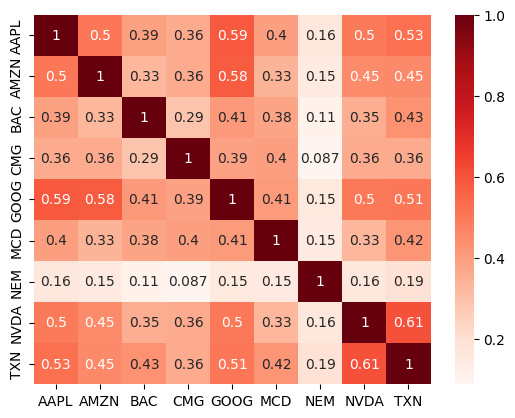

In [8]:
#Newmont has weak corelation compared to the rest of PFO, but the rest is rather highly positively correlated so Beta should be quite high - if violatility is high portfolo is risky
sns.heatmap(log_return.corr(), cmap = 'Reds', annot=True)

In [9]:
#Creating pfo avg daily return and rolling profit instead of daily 
pfo_avg = (log_return*weight).sum(axis=1)
log_return = log_return.rolling(window = 5).sum()

In [10]:
pfo_avg

Date
2007-01-04    0.007050
2007-01-05   -0.013327
2007-01-08   -0.001345
2007-01-09    0.009249
2007-01-10    0.012210
                ...   
2024-03-12    0.005105
2024-03-13   -0.000565
2024-03-14   -0.002049
2024-03-15   -0.006384
2024-03-18    0.013979
Length: 4330, dtype: float64

In [11]:
log_return = log_return.dropna()

In [12]:
#Creating cov matrix to calculate std and EX of pfo
cov_matrix = log_return.cov()

In [13]:
pfo_ev = (log_return.mean())@weight
pfo_std = np.sqrt(weight.T @ cov_matrix @ weight)

In [14]:
cov_matrix

,AAPL,AMZN,BAC,CMG,GOOG,MCD,NEM,NVDA,TXN
AAPL,0.001866,0.001053,0.000969,0.000849,0.000988,0.000385,0.000402,0.001423,0.000743
AMZN,0.001053,0.002609,0.001032,0.001036,0.001119,0.000404,0.000355,0.001556,0.000819
BAC,0.000969,0.001032,0.004802,0.001115,0.000960,0.000539,0.000205,0.001617,0.000983
CMG,0.000849,0.001036,0.001115,0.002962,0.000774,0.000543,0.000263,0.001263,0.000708
GOOG,0.000988,0.001119,0.000960,0.000774,0.001591,0.000378,0.000305,0.001275,0.000682
MCD,0.000385,0.000404,0.000539,0.000543,0.000378,0.000680,0.000189,0.000477,0.000331
NEM,0.000402,0.000355,0.000205,0.000263,0.000305,0.000189,0.002758,0.000578,0.000372
NVDA,0.001423,0.001556,0.001617,0.001263,0.001275,0.000477,0.000578,0.004629,0.001408
TXN,0.000743,0.000819,0.000983,0.000708,0.000682,0.000331,0.000372,0.001408,0.001288


54599.42395504566

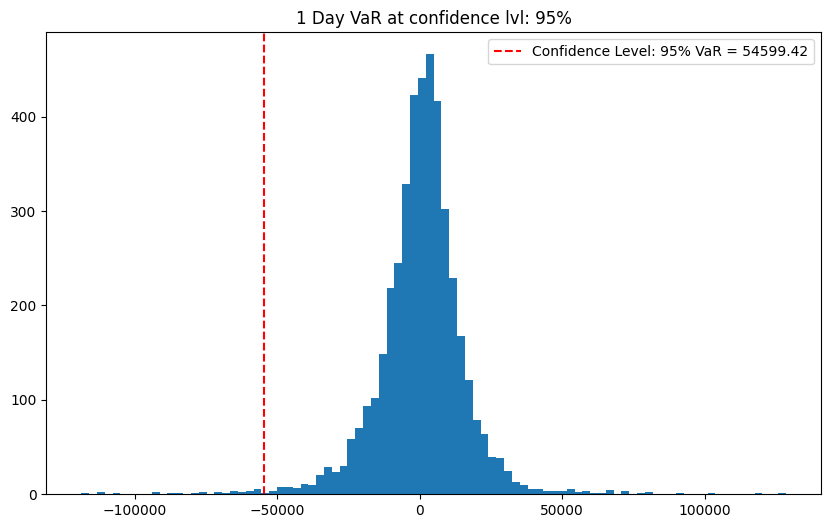

In [15]:
confidence_lvl = 0.95
#Expected returns***
returns = pfo_avg*Inintial_inv
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)


plt.figure(figsize=(10,6))
plt.hist(returns, bins = 90)
plt.axvline(-VaR, color='r', linestyle='dashed', label = f'Confidence Level: {confidence_lvl:.0%} VaR = {np.round(VaR,2)}')
plt.legend()
plt.title(f'1 Day VaR at confidence lvl: {confidence_lvl:.0%}')

VaR



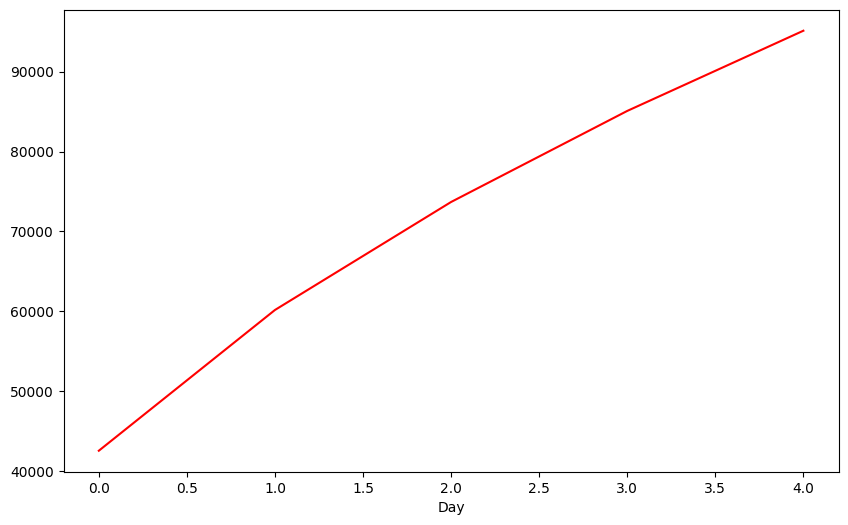

In [16]:
#Portfolio will not lose more than 90k in 5 days with 90% confidence
confidence_lvl = 0.9
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))
    
plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')

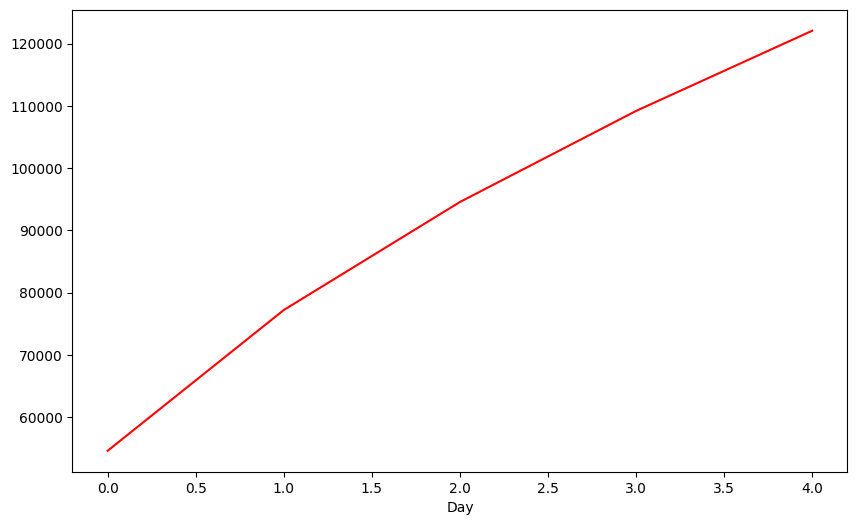

In [17]:
#Portfolio will not lose more than 110k in 5 days with 95% confidence
confidence_lvl = 0.95
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))

plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')


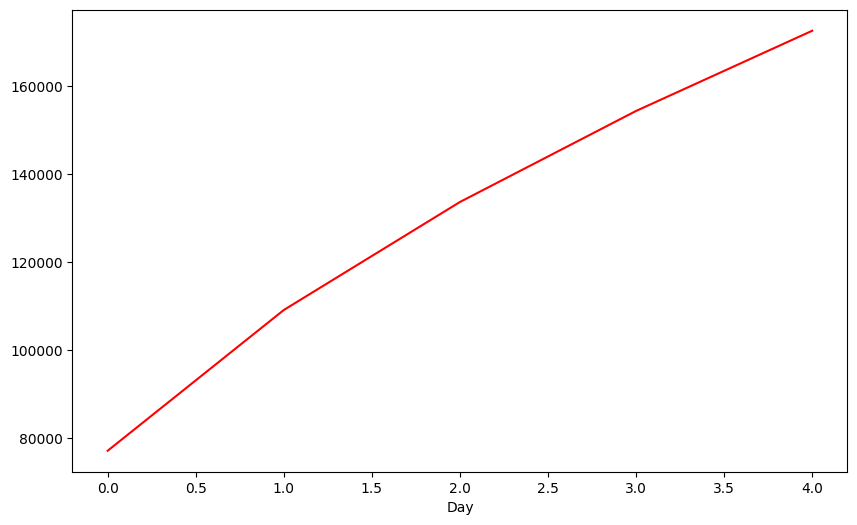

In [18]:
#Portfolio will not lose more than 160k in 5 days with 99% confidence
confidence_lvl = 0.99
VaR = Inintial_inv*pfo_std*norm.ppf(confidence_lvl)
var_array = []
num_days = int(5)

for x in range(1, num_days+1):
    var_array.append(np.round(VaR*np.sqrt(x),2))

plt.figure(figsize=(10,6))
plt.xlabel('Day')
plt.plot(var_array, 'r')

MonteCarlo Simulation

In [113]:
pfo_ev = (log_return.mean())@weight
pfo_std = np.sqrt(weight.T @ cov_matrix @ weight)
Inintial_inv = 1000000


Text(0.5, 1.0, '1 Day VaR at confidence lvl: 90%')

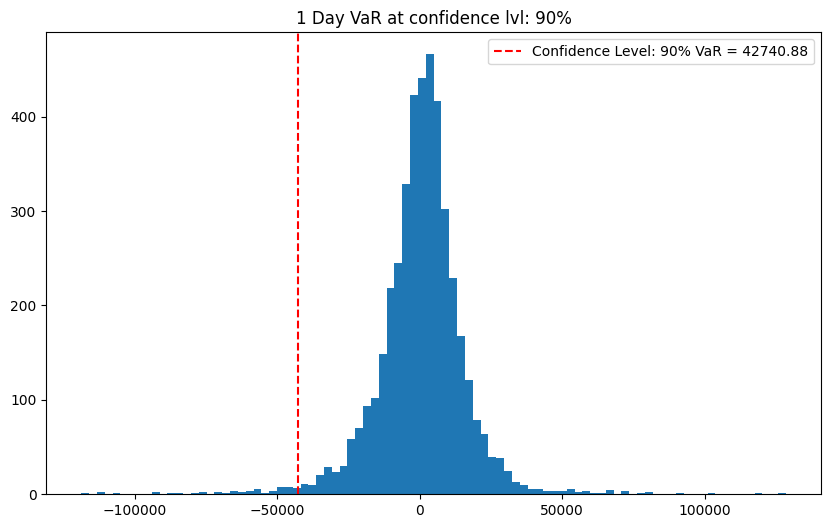

In [142]:
epochs = 100000
scenarioReturn = []

for i in range(epochs):
    z_score = np.random.normal(0,1)
    scenarioReturn.append(np.round(Inintial_inv*pfo_std*z_score,2))

confidence_lvl = 0.9
VaR = -np.percentile(scenarioReturn, 100*(1-confidence_lvl))

plt.figure(figsize=(10,6))
plt.hist(returns, bins = 90)
plt.axvline(-VaR, color='r', linestyle='dashed', label = f'Confidence Level: {confidence_lvl:.0%} VaR = {np.round(VaR,2)}')
plt.legend()
plt.title(f'1 Day VaR at confidence lvl: {confidence_lvl:.0%}')

#Portfolio will not lose more than 42740 in 1 day with confidence of 90% (there is 10% chance that the pfo will lose more than 42740)


Text(0.5, 1.0, '1 Day VaR at confidence lvl: 95%')

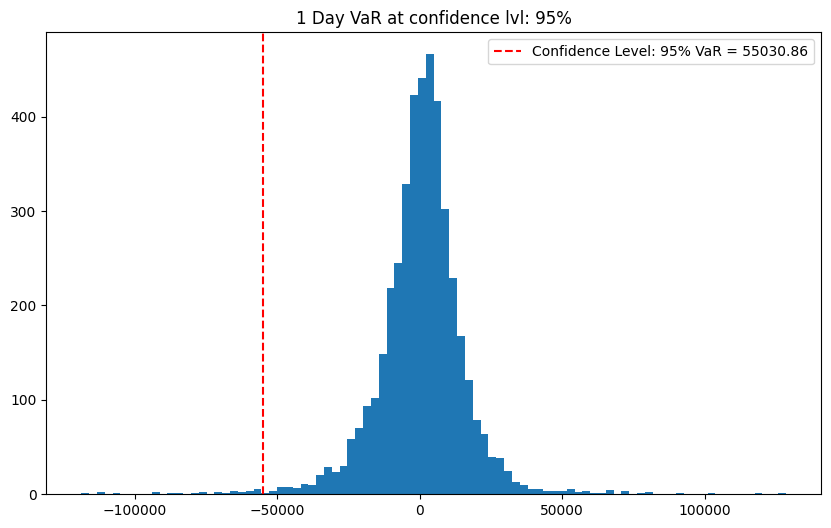

In [143]:
epochs = 100000
scenarioReturn = []

for i in range(epochs):
    z_score = np.random.normal(0,1)
    scenarioReturn.append(np.round(Inintial_inv*pfo_std*z_score,2))

confidence_lvl = 0.95
VaR = -np.percentile(scenarioReturn, 100*(1-confidence_lvl))

plt.figure(figsize=(10,6))
plt.hist(returns, bins = 90)
plt.axvline(-VaR, color='r', linestyle='dashed', label = f'Confidence Level: {confidence_lvl:.0%} VaR = {np.round(VaR,2)}')
plt.legend()
plt.title(f'1 Day VaR at confidence lvl: {confidence_lvl:.0%}')

#There is 5% chance that pfo will lose more than 55030 in 1 day 

Text(0.5, 1.0, '1 Day VaR at confidence lvl: 99%')

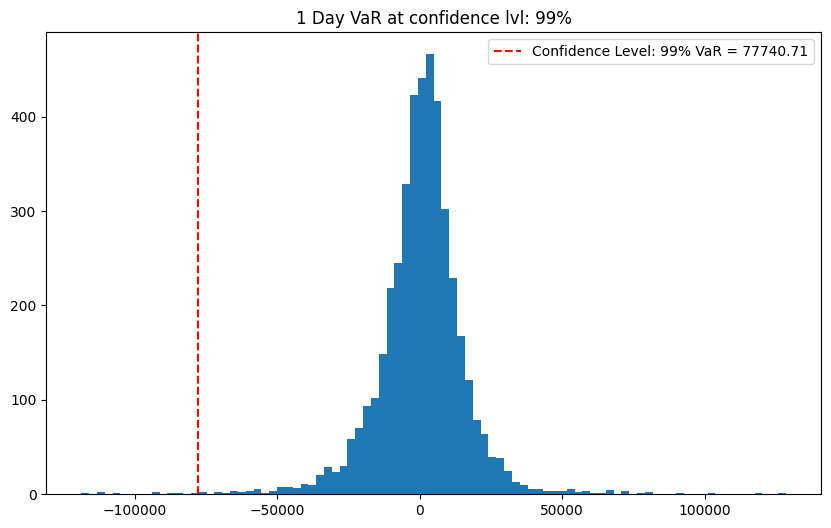

In [144]:
epochs = 100000
scenarioReturn = []

for i in range(epochs):
    z_score = np.random.normal(0,1)
    scenarioReturn.append(np.round(Inintial_inv*pfo_std*z_score,2))

confidence_lvl = 0.99
VaR = -np.percentile(scenarioReturn, 100*(1-confidence_lvl))

plt.figure(figsize=(10,6))
plt.hist(returns, bins = 90)
plt.axvline(-VaR, color='r', linestyle='dashed', label = f'Confidence Level: {confidence_lvl:.0%} VaR = {np.round(VaR,2)}')
plt.legend()
plt.title(f'1 Day VaR at confidence lvl: {confidence_lvl:.0%}')

#There is 1% chance that the pfo will lose more than 77740 in 1 day 